In [1]:

#imports
import numpy as np
import pandas as pd
import string # from some string manipulation tasks
import nltk # natural language toolkit
import re # regex
import csv
from textblob import TextBlob
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem import SnowballStemmer # For stemming the sentence
from contractions import contractions_dict # to solve contractions
from autocorrect import Speller #correcting the spellings

In [2]:
train = pd.read_csv('C:\\Users\\chris\\Downloads\\Menthal\\MH_Campaigns1723.csv')

In [3]:
train.head()

,Date,ID,url,username,source,location,tweet,likes,rt,followers,replies,campaign,likes_pf,replies_pf,rt_pf,engagement,engagement_0
0,2023-02-15 13:48:52+00:00,1625854658601418753,https://twitter.com/haringeyiapt/status/162585...,haringeyiapt,Twitter for iPhone,Haringey,"People with OCD experience intensely negative,...",5,1,317,0,OCD,0.015773,0.000000,0.006309,0.022082,0.031546
1,2023-02-09 22:37:56+00:00,1623813475469344769,https://twitter.com/scrupulOCD_KC/status/16238...,scrupulOCD_KC,Twitter for Android,unknown,Hello all I'm Erika an @IOCDF grassroots advoc...,0,0,9,0,OCD,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022-10-20 11:30:07+00:00,1583057973496406016,https://twitter.com/FootstepsCandC/status/1583...,FootstepsCandC,SmarterQueue,Gloucester,"In light of last week's OCD Awareness week, we...",0,0,905,0,OCD,0.000000,0.000000,0.000000,0.000000,0.000000
3,2022-10-18 19:42:14+00:00,1582457044451627008,https://twitter.com/IOCDF/status/1582457044451...,IOCDF,Twitter Web App,"Boston, MA",The GIFS now have over 1.4 million views on GI...,5,2,19257,0,OCD,0.000260,0.000000,0.000208,0.000467,0.000519
4,2022-10-18 19:42:13+00:00,1582457038969262080,https://twitter.com/IOCDF/status/1582457038969...,IOCDF,Twitter Web App,"Boston, MA","The 2022 #OCDweek events, activities, and live...",7,2,19257,1,OCD,0.000364,0.000156,0.000208,0.000727,0.000779


In [4]:
# remove nan or missing values from multiple colu
train =  train.dropna()
train.head()

,Date,ID,url,username,source,location,tweet,likes,rt,followers,replies,campaign,likes_pf,replies_pf,rt_pf,engagement,engagement_0
0,2023-02-15 13:48:52+00:00,1625854658601418753,https://twitter.com/haringeyiapt/status/162585...,haringeyiapt,Twitter for iPhone,Haringey,"People with OCD experience intensely negative,...",5,1,317,0,OCD,0.015773,0.000000,0.006309,0.022082,0.031546
1,2023-02-09 22:37:56+00:00,1623813475469344769,https://twitter.com/scrupulOCD_KC/status/16238...,scrupulOCD_KC,Twitter for Android,unknown,Hello all I'm Erika an @IOCDF grassroots advoc...,0,0,9,0,OCD,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022-10-20 11:30:07+00:00,1583057973496406016,https://twitter.com/FootstepsCandC/status/1583...,FootstepsCandC,SmarterQueue,Gloucester,"In light of last week's OCD Awareness week, we...",0,0,905,0,OCD,0.000000,0.000000,0.000000,0.000000,0.000000
3,2022-10-18 19:42:14+00:00,1582457044451627008,https://twitter.com/IOCDF/status/1582457044451...,IOCDF,Twitter Web App,"Boston, MA",The GIFS now have over 1.4 million views on GI...,5,2,19257,0,OCD,0.000260,0.000000,0.000208,0.000467,0.000519
4,2022-10-18 19:42:13+00:00,1582457038969262080,https://twitter.com/IOCDF/status/1582457038969...,IOCDF,Twitter Web App,"Boston, MA","The 2022 #OCDweek events, activities, and live...",7,2,19257,1,OCD,0.000364,0.000156,0.000208,0.000727,0.000779


In [5]:
train.shape

(724756, 17)

In [6]:
train["tweet"][1]

"Hello all I'm Erika an @IOCDF grassroots advocate that loves to #rockyourvalues by painting rocks to spread awareness and lower stigma about OCD in our community.  Here is a look back from #OCDweek 2022!! Excited for my workshop at the end of Feb! \U0001faf6\n\nhttps://t.co/nzsi43m1gW"

In [7]:
#Create a feature word count that count s the word count in each string.  EAch tweet will be a sting. What split does
#is look for individual word structures.
train['word_count'] = train['tweet'].apply(lambda x: len(str(x).split(" ")))

In [8]:
train[['tweet','word_count']].head()

,tweet,word_count
0,"People with OCD experience intensely negative,...",45
1,Hello all I'm Erika an @IOCDF grassroots advoc...,45
2,"In light of last week's OCD Awareness week, we...",43
3,The GIFS now have over 1.4 million views on GI...,47
4,"The 2022 #OCDweek events, activities, and live...",39


In [9]:
train.head(5)

,Date,ID,url,username,source,location,tweet,likes,rt,followers,replies,campaign,likes_pf,replies_pf,rt_pf,engagement,engagement_0,word_count
0,2023-02-15 13:48:52+00:00,1625854658601418753,https://twitter.com/haringeyiapt/status/162585...,haringeyiapt,Twitter for iPhone,Haringey,"People with OCD experience intensely negative,...",5,1,317,0,OCD,0.015773,0.000000,0.006309,0.022082,0.031546,45
1,2023-02-09 22:37:56+00:00,1623813475469344769,https://twitter.com/scrupulOCD_KC/status/16238...,scrupulOCD_KC,Twitter for Android,unknown,Hello all I'm Erika an @IOCDF grassroots advoc...,0,0,9,0,OCD,0.000000,0.000000,0.000000,0.000000,0.000000,45
2,2022-10-20 11:30:07+00:00,1583057973496406016,https://twitter.com/FootstepsCandC/status/1583...,FootstepsCandC,SmarterQueue,Gloucester,"In light of last week's OCD Awareness week, we...",0,0,905,0,OCD,0.000000,0.000000,0.000000,0.000000,0.000000,43
3,2022-10-18 19:42:14+00:00,1582457044451627008,https://twitter.com/IOCDF/status/1582457044451...,IOCDF,Twitter Web App,"Boston, MA",The GIFS now have over 1.4 million views on GI...,5,2,19257,0,OCD,0.000260,0.000000,0.000208,0.000467,0.000519,47
4,2022-10-18 19:42:13+00:00,1582457038969262080,https://twitter.com/IOCDF/status/1582457038969...,IOCDF,Twitter Web App,"Boston, MA","The 2022 #OCDweek events, activities, and live...",7,2,19257,1,OCD,0.000364,0.000156,0.000208,0.000727,0.000779,39


In [10]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [11]:
train['avg_word'] = train['tweet'].apply(lambda x: avg_word(x))

In [12]:
train[['tweet','avg_word']].head()

,tweet,avg_word
0,"People with OCD experience intensely negative,...",5.711111
1,Hello all I'm Erika an @IOCDF grassroots advoc...,5.066667
2,"In light of last week's OCD Awareness week, we...",5.409091
3,The GIFS now have over 1.4 million views on GI...,4.744681
4,"The 2022 #OCDweek events, activities, and live...",6.102564


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import nltk

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [16]:
#Going to take each one of the tweets x represents them, its going to go through each one of the words
#x.split then its going to check each individual word to see if its in the stoplist if the word is we keep it
#then we get the length and return it inot the stopwords new feature.
train['stopwords'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['tweet','stopwords']].head()

,tweet,stopwords
0,"People with OCD experience intensely negative,...",15
1,Hello all I'm Erika an @IOCDF grassroots advoc...,18
2,"In light of last week's OCD Awareness week, we...",16
3,The GIFS now have over 1.4 million views on GI...,19
4,"The 2022 #OCDweek events, activities, and live...",12


In [17]:
train['hastags'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['tweet','hastags']].head()

,tweet,hastags
0,"People with OCD experience intensely negative,...",2
1,Hello all I'm Erika an @IOCDF grassroots advoc...,2
2,"In light of last week's OCD Awareness week, we...",1
3,The GIFS now have over 1.4 million views on GI...,1
4,"The 2022 #OCDweek events, activities, and live...",1


In [18]:
train['numerics'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['tweet','numerics']].head()

,tweet,numerics
0,"People with OCD experience intensely negative,...",0
1,Hello all I'm Erika an @IOCDF grassroots advoc...,0
2,"In light of last week's OCD Awareness week, we...",2
3,The GIFS now have over 1.4 million views on GI...,0
4,"The 2022 #OCDweek events, activities, and live...",2


In [19]:
train['upper'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['tweet','upper']].head()

,tweet,upper
0,"People with OCD experience intensely negative,...",3
1,Hello all I'm Erika an @IOCDF grassroots advoc...,2
2,"In light of last week's OCD Awareness week, we...",3
3,The GIFS now have over 1.4 million views on GI...,3
4,"The 2022 #OCDweek events, activities, and live...",1


In [20]:
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['tweet'].head()

0    people with ocd experience intensely negative,...
1    hello all i'm erika an @iocdf grassroots advoc...
2    in light of last week's ocd awareness week, we...
3    the gifs now have over 1.4 million views on gi...
4    the 2022 #ocdweek events, activities, and live...
Name: tweet, dtype: object

In [21]:
#To clean all of the special characters out o fthe text use below an replaced by what is after comma look up regex for all of these.
train['tweet'] = train['tweet'].str.replace('[^\w\s]','')
train['tweet'].head()

C:\Users\chris\AppData\Local\Temp\ipykernel_9920\2352108740.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train['tweet'] = train['tweet'].str.replace('[^\w\s]','')


0    people with ocd experience intensely negative ...
1    hello all im erika an iocdf grassroots advocat...
2    in light of last weeks ocd awareness week we w...
3    the gifs now have over 14 million views on gip...
4    the 2022 ocdweek events activities and livestr...
Name: tweet, dtype: object

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['tweet'].head()

0    people ocd experience intensely negative repet...
1    hello im erika iocdf grassroots advocate loves...
2    light last weeks ocd awareness week wanted off...
3    gifs 14 million views giphy hope campaign shif...
4    2022 ocdweek events activities livestreams led...
Name: tweet, dtype: object

In [23]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[:10]
freq

mentalhealthawarenessweek    444167
mental                       309002
health                       305118
week                         224770
awareness                    175144
mentalhealth                 101121
amp                           99496
eatingdisorders               98678
help                          81229
support                       77545
dtype: int64

In [24]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['tweet'].head()

0    people ocd experience intensely negative repet...
1    hello im erika iocdf grassroots advocate loves...
2    light last weeks ocd wanted offer signposting ...
3    gifs 14 million views giphy hope campaign shif...
4    2022 ocdweek events activities livestreams led...
Name: tweet, dtype: object

In [25]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[-10:]
freq

httpstcozppb7wta0c                1
httpstcoswkcpyg5jc                1
httpstcozz4mw0h3p5                1
httpstco9r0wt7uzwn                1
httpstcoeoqpjemixq                1
httpstcoqzuu45y4lo                1
httpstcobtnr4p7rsr                1
alexhealthymindscalderdalecouk    1
httpstcolzcmu5kgi5                1
vibemedia                         1
dtype: int64

In [26]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['tweet'].head()

0    people ocd experience intensely negative repet...
1    hello im erika iocdf grassroots advocate loves...
2    light last weeks ocd wanted offer signposting ...
3    gifs 14 million views giphy hope campaign shif...
4    2022 ocdweek events activities livestreams led...
Name: tweet, dtype: object

In [27]:
from textblob import TextBlob
train['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    people old experience intensely negative repet...
1    hello in erie iodi grassroots advocate loves r...
2    light last weeks old wanted offer signposting ...
3    gift 14 million views gipsy hope campaign shif...
4    2022 ocdweek events activities livestreams led...
Name: tweet, dtype: object

In [28]:
nltk.download('punkt')
TextBlob(train['tweet'][1]).words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['hello', 'im', 'erika', 'iocdf', 'grassroots', 'advocate', 'loves', 'rockyourvalues', 'painting', 'rocks', 'spread', 'lower', 'stigma', 'ocd', 'community', 'look', 'back', 'ocdweek', '2022', 'excited', 'workshop', 'end', 'feb', 'httpstconzsi43m1gw'])

In [29]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    peopl ocd experi intens neg repetit intrus tho...
1    hello im erika iocdf grassroot advoc love rock...
2    light last week ocd want offer signpost option...
3    gif 14 million view giphi hope campaign shift ...
4    2022 ocdweek event activ livestream led amaz p...
Name: tweet, dtype: object

In [30]:
TextBlob(train['tweet'][1]).ngrams(2)

[WordList(['hello', 'im']),
 WordList(['im', 'erika']),
 WordList(['erika', 'iocdf']),
 WordList(['iocdf', 'grassroots']),
 WordList(['grassroots', 'advocate']),
 WordList(['advocate', 'loves']),
 WordList(['loves', 'rockyourvalues']),
 WordList(['rockyourvalues', 'painting']),
 WordList(['painting', 'rocks']),
 WordList(['rocks', 'spread']),
 WordList(['spread', 'lower']),
 WordList(['lower', 'stigma']),
 WordList(['stigma', 'ocd']),
 WordList(['ocd', 'community']),
 WordList(['community', 'look']),
 WordList(['look', 'back']),
 WordList(['back', 'ocdweek']),
 WordList(['ocdweek', '2022']),
 WordList(['2022', 'excited']),
 WordList(['excited', 'workshop']),
 WordList(['workshop', 'end']),
 WordList(['end', 'feb']),
 WordList(['feb', 'httpstconzsi43m1gw'])]

In [31]:
tf1 = (train['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,hello,1
1,im,1
2,feb,1
3,end,1
4,workshop,1
5,excited,1
6,2022,1
7,ocdweek,1
8,back,1
9,look,1


In [32]:
import numpy as np

for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['tweet'].str.contains(word)])))

tf1

,words,tf,idf
0,hello,1,5.057390
1,im,1,1.200524
2,feb,1,4.971012
3,end,1,2.340158
4,workshop,1,4.917185
5,excited,1,5.392822
6,2022,1,4.510151
7,ocdweek,1,5.458959
8,back,1,4.007514
9,look,1,2.808418


In [33]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,hello,1,5.057390,5.057390
1,im,1,1.200524,1.200524
2,feb,1,4.971012,4.971012
3,end,1,2.340158,2.340158
4,workshop,1,4.917185,4.917185
5,excited,1,5.392822,5.392822
6,2022,1,4.510151,4.510151
7,ocdweek,1,5.458959,5.458959
8,back,1,4.007514,4.007514
9,look,1,2.808418,2.808418


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['tweet'])

train_vect

<724756x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 5018229 stored elements in Compressed Sparse Row format>

In [35]:
print(train_vect)

  (0, 604)	0.23263300498655173
  (0, 875)	0.20294965279075888
  (0, 27)	0.22748125468173644
  (0, 51)	0.1602591309573134
  (0, 113)	0.2367076308721444
  (0, 309)	0.184548944467403
  (0, 883)	0.2049497641970563
  (0, 591)	0.24208627608456576
  (0, 288)	0.3725217125604252
  (0, 603)	0.6585606723692228
  (0, 636)	0.2531581349391219
  (1, 306)	0.33251465638009464
  (1, 267)	0.25156062943934215
  (1, 977)	0.30488082059093
  (1, 285)	0.3014210831998351
  (1, 17)	0.3060559065068308
  (1, 501)	0.20491702781148396
  (1, 158)	0.2375569596506812
  (1, 822)	0.24363591545051727
  (1, 811)	0.2860305015602225
  (1, 411)	0.21946340555884172
  (1, 377)	0.29278771225088396
  (1, 604)	0.30441887343128887
  (1, 603)	0.28725975201495363
  (2, 426)	0.22516496984449968
  :	:
  (724751, 450)	0.41191787273680536
  (724751, 199)	0.34946090074992914
  (724752, 922)	0.46655448258569554
  (724752, 928)	0.5943923217198109
  (724752, 916)	0.6549997577554717
  (724753, 922)	0.37475129104280064
  (724753, 938)	0.55230

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(train['tweet'])
train_bow

<724756x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 5769445 stored elements in Compressed Sparse Row format>

# Check the first 5 for sentiment

#The results displays the polarity is it negative positive on the right it shows us It is negative and on the right there is a definite subjectivity if there was a 1 interested in the one on the left 0 is neutral 1 is positive and -1 negative.

In [37]:
train['tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

0                              (-0.0375, 0.375)
1                               (0.1875, 0.375)
2    (0.16666666666666666, 0.28888888888888886)
3                                   (0.25, 0.5)
4      (0.2787878787878788, 0.5666666666666667)
Name: tweet, dtype: object

In [38]:
#Using the 0 in senriment because this time we want to capture the sentiment only.
train['sentiment'] = train['tweet'].apply(lambda x: TextBlob(x).sentiment[1] )
train[['tweet','sentiment']].head()

,tweet,sentiment
0,people ocd experience intensely negative repet...,0.375000
1,hello im erika iocdf grassroots advocate loves...,0.375000
2,light last weeks ocd wanted offer signposting ...,0.288889
3,gifs 14 million views giphy hope campaign shif...,0.500000
4,2022 ocdweek events activities livestreams led...,0.566667


In [40]:
train.head(5)

,Date,ID,url,username,source,location,tweet,likes,rt,followers,...,rt_pf,engagement,engagement_0,word_count,avg_word,stopwords,hastags,numerics,upper,sentiment
0,2023-02-15 13:48:52+00:00,1625854658601418753,https://twitter.com/haringeyiapt/status/162585...,haringeyiapt,Twitter for iPhone,Haringey,people ocd experience intensely negative repet...,5,1,317,...,0.006309,0.022082,0.031546,45,5.711111,15,2,0,3,0.375000
1,2023-02-09 22:37:56+00:00,1623813475469344769,https://twitter.com/scrupulOCD_KC/status/16238...,scrupulOCD_KC,Twitter for Android,unknown,hello im erika iocdf grassroots advocate loves...,0,0,9,...,0.000000,0.000000,0.000000,45,5.066667,18,2,0,2,0.375000
2,2022-10-20 11:30:07+00:00,1583057973496406016,https://twitter.com/FootstepsCandC/status/1583...,FootstepsCandC,SmarterQueue,Gloucester,light last weeks ocd wanted offer signposting ...,0,0,905,...,0.000000,0.000000,0.000000,43,5.409091,16,1,2,3,0.288889
3,2022-10-18 19:42:14+00:00,1582457044451627008,https://twitter.com/IOCDF/status/1582457044451...,IOCDF,Twitter Web App,"Boston, MA",gifs 14 million views giphy hope campaign shif...,5,2,19257,...,0.000208,0.000467,0.000519,47,4.744681,19,1,0,3,0.500000
4,2022-10-18 19:42:13+00:00,1582457038969262080,https://twitter.com/IOCDF/status/1582457038969...,IOCDF,Twitter Web App,"Boston, MA",2022 ocdweek events activities livestreams led...,7,2,19257,...,0.000208,0.000727,0.000779,39,6.102564,12,1,2,1,0.566667


# Sentiment Analysis Prediction Model

In [39]:
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt    
%matplotlib inline
import seaborn as sns              
from bs4 import BeautifulSoup 

In [41]:
#now that the data has been explored and cleaned saving it to be used for the model
train.to_csv('df_sentiment.csv')

In [42]:

sentiment = pd.read_csv('df_sentiment.csv')

In [43]:
sentiment.head()

,Unnamed: 0,Date,ID,url,username,source,location,tweet,likes,rt,...,rt_pf,engagement,engagement_0,word_count,avg_word,stopwords,hastags,numerics,upper,sentiment
0,0,2023-02-15 13:48:52+00:00,1625854658601418753,https://twitter.com/haringeyiapt/status/162585...,haringeyiapt,Twitter for iPhone,Haringey,people ocd experience intensely negative repet...,5,1,...,0.006309,0.022082,0.031546,45,5.711111,15,2,0,3,0.375000
1,1,2023-02-09 22:37:56+00:00,1623813475469344769,https://twitter.com/scrupulOCD_KC/status/16238...,scrupulOCD_KC,Twitter for Android,unknown,hello im erika iocdf grassroots advocate loves...,0,0,...,0.000000,0.000000,0.000000,45,5.066667,18,2,0,2,0.375000
2,2,2022-10-20 11:30:07+00:00,1583057973496406016,https://twitter.com/FootstepsCandC/status/1583...,FootstepsCandC,SmarterQueue,Gloucester,light last weeks ocd wanted offer signposting ...,0,0,...,0.000000,0.000000,0.000000,43,5.409091,16,1,2,3,0.288889
3,3,2022-10-18 19:42:14+00:00,1582457044451627008,https://twitter.com/IOCDF/status/1582457044451...,IOCDF,Twitter Web App,"Boston, MA",gifs 14 million views giphy hope campaign shif...,5,2,...,0.000208,0.000467,0.000519,47,4.744681,19,1,0,3,0.500000
4,4,2022-10-18 19:42:13+00:00,1582457038969262080,https://twitter.com/IOCDF/status/1582457038969...,IOCDF,Twitter Web App,"Boston, MA",2022 ocdweek events activities livestreams led...,7,2,...,0.000208,0.000727,0.000779,39,6.102564,12,1,2,1,0.566667


In [44]:
sentiment.reset_index()

,index,Unnamed: 0,Date,ID,url,username,source,location,tweet,likes,...,rt_pf,engagement,engagement_0,word_count,avg_word,stopwords,hastags,numerics,upper,sentiment
0,0,0,2023-02-15 13:48:52+00:00,1625854658601418753,https://twitter.com/haringeyiapt/status/162585...,haringeyiapt,Twitter for iPhone,Haringey,people ocd experience intensely negative repet...,5,...,0.006309,0.022082,0.031546,45,5.711111,15,2,0,3,0.375000
1,1,1,2023-02-09 22:37:56+00:00,1623813475469344769,https://twitter.com/scrupulOCD_KC/status/16238...,scrupulOCD_KC,Twitter for Android,unknown,hello im erika iocdf grassroots advocate loves...,0,...,0.000000,0.000000,0.000000,45,5.066667,18,2,0,2,0.375000
2,2,2,2022-10-20 11:30:07+00:00,1583057973496406016,https://twitter.com/FootstepsCandC/status/1583...,FootstepsCandC,SmarterQueue,Gloucester,light last weeks ocd wanted offer signposting ...,0,...,0.000000,0.000000,0.000000,43,5.409091,16,1,2,3,0.288889
3,3,3,2022-10-18 19:42:14+00:00,1582457044451627008,https://twitter.com/IOCDF/status/1582457044451...,IOCDF,Twitter Web App,"Boston, MA",gifs 14 million views giphy hope campaign shif...,5,...,0.000208,0.000467,0.000519,47,4.744681,19,1,0,3,0.500000
4,4,4,2022-10-18 19:42:13+00:00,1582457038969262080,https://twitter.com/IOCDF/status/1582457038969...,IOCDF,Twitter Web App,"Boston, MA",2022 ocdweek events activities livestreams led...,7,...,0.000208,0.000727,0.000779,39,6.102564,12,1,2,1,0.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724751,724751,724751,2017-01-21 16:57:43+00:00,822850673314295808,https://twitter.com/ConorAllanIRL/status/82285...,ConorAllanIRL,Twitter for iPhone,England,join uni day march 2nd umhd17 httpstcopb2vgzjdgm,0,...,0.000000,0.000000,0.000000,14,5.357143,4,1,0,1,0.000000
724752,724752,724752,2017-01-21 16:30:49+00:00,822843904068321281,https://twitter.com/StudentMindsOrg/status/822...,StudentMindsOrg,Hootsuite,United Kingdom,6million twitter accounts reached using unimen...,5,...,0.000481,0.000682,0.000401,16,8.562500,2,1,1,1,0.000000
724753,724753,724753,2017-01-11 18:19:02+00:00,819247260848553998,https://twitter.com/StudentMindsYSJ/status/819...,StudentMindsYSJ,Twitter Web Client,York,excited unimentalhealthday begin planning volu...,1,...,0.007435,0.011152,0.007435,14,5.928571,6,1,0,0,0.750000
724754,724754,724754,2017-01-10 11:23:37+00:00,818780330983354368,https://twitter.com/SHUDisabledRep/status/8187...,SHUDisabledRep,Twitter for Android,"Sheffield, England",lots stuff happening coming month btw uni day ...,1,...,0.000000,0.004902,0.009804,22,5.545455,4,0,0,0,0.300000


In [45]:
sentiment['sentiment'] = sentiment['sentiment'].fillna(0).astype(np.int64)
print(sentiment)

        Unnamed: 0                       Date                   ID  \
0                0  2023-02-15 13:48:52+00:00  1625854658601418753   
1                1  2023-02-09 22:37:56+00:00  1623813475469344769   
2                2  2022-10-20 11:30:07+00:00  1583057973496406016   
3                3  2022-10-18 19:42:14+00:00  1582457044451627008   
4                4  2022-10-18 19:42:13+00:00  1582457038969262080   
...            ...                        ...                  ...   
724751      724751  2017-01-21 16:57:43+00:00   822850673314295808   
724752      724752  2017-01-21 16:30:49+00:00   822843904068321281   
724753      724753  2017-01-11 18:19:02+00:00   819247260848553998   
724754      724754  2017-01-10 11:23:37+00:00   818780330983354368   
724755      724755  2017-01-05 14:37:25+00:00   817017163294867456   

                                                      url         username  \
0       https://twitter.com/haringeyiapt/status/162585...     haringeyiapt   
1  

In [46]:
sentiment.head()

,Unnamed: 0,Date,ID,url,username,source,location,tweet,likes,rt,...,rt_pf,engagement,engagement_0,word_count,avg_word,stopwords,hastags,numerics,upper,sentiment
0,0,2023-02-15 13:48:52+00:00,1625854658601418753,https://twitter.com/haringeyiapt/status/162585...,haringeyiapt,Twitter for iPhone,Haringey,people ocd experience intensely negative repet...,5,1,...,0.006309,0.022082,0.031546,45,5.711111,15,2,0,3,0
1,1,2023-02-09 22:37:56+00:00,1623813475469344769,https://twitter.com/scrupulOCD_KC/status/16238...,scrupulOCD_KC,Twitter for Android,unknown,hello im erika iocdf grassroots advocate loves...,0,0,...,0.000000,0.000000,0.000000,45,5.066667,18,2,0,2,0
2,2,2022-10-20 11:30:07+00:00,1583057973496406016,https://twitter.com/FootstepsCandC/status/1583...,FootstepsCandC,SmarterQueue,Gloucester,light last weeks ocd wanted offer signposting ...,0,0,...,0.000000,0.000000,0.000000,43,5.409091,16,1,2,3,0
3,3,2022-10-18 19:42:14+00:00,1582457044451627008,https://twitter.com/IOCDF/status/1582457044451...,IOCDF,Twitter Web App,"Boston, MA",gifs 14 million views giphy hope campaign shif...,5,2,...,0.000208,0.000467,0.000519,47,4.744681,19,1,0,3,0
4,4,2022-10-18 19:42:13+00:00,1582457038969262080,https://twitter.com/IOCDF/status/1582457038969...,IOCDF,Twitter Web App,"Boston, MA",2022 ocdweek events activities livestreams led...,7,2,...,0.000208,0.000727,0.000779,39,6.102564,12,1,2,1,0


In [47]:
sentiment.isnull().sum()

Unnamed: 0        0
Date              0
ID                0
url               0
username          0
source            0
location          0
tweet           372
likes             0
rt                0
followers         0
replies           0
campaign          0
likes_pf          0
replies_pf        0
rt_pf             0
engagement        0
engagement_0      0
word_count        0
avg_word          0
stopwords         0
hastags           0
numerics          0
upper             0
sentiment         0
dtype: int64

In [48]:
sentiment = sentiment.dropna()

In [49]:
sentiment.sentiment.value_counts()

0    688243
1     36141
Name: sentiment, dtype: int64

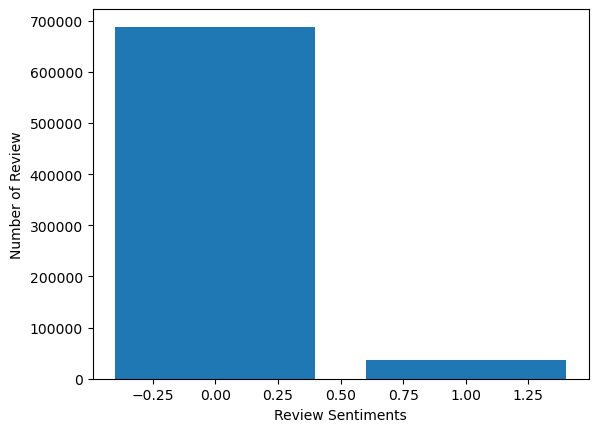

In [50]:
sentiment_count=sentiment.groupby('sentiment').count()
plt.bar(sentiment_count.index.values, sentiment_count['tweet'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [51]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(sentiment['tweet'])

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, sentiment['sentiment'], test_size=0.3, random_state=1)

In [56]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9472105137219533


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(sentiment['tweet'])

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, sentiment['sentiment'], test_size=0.3, random_state=123)

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9502199561928252
